## Explorations tableaux

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_customers = pd.read_csv('customers.csv')

In [3]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
df_customers.client_id.nunique()

8623

In [5]:
df_customers.shape

(8623, 3)

In [6]:
df_products= pd.read_csv('products.csv')

In [7]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [8]:
df_products.id_prod.value_counts()

1_666     1
0_1016    1
0_249     1
2_95      1
0_1231    1
         ..
0_1583    1
2_212     1
0_1913    1
0_1536    1
0_1651    1
Name: id_prod, Length: 3287, dtype: int64

In [9]:
df_products.id_prod.nunique()

3287

In [10]:
df_products.shape

(3287, 3)

In [11]:
df_transactions = pd.read_csv('transactions.csv')

In [12]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [13]:
# fusion des 3 tables 
df = pd.merge(df_transactions,df_products,on='id_prod',how='left')

In [14]:
df= pd.merge(df, df_customers, on='client_id', how= 'left')

In [15]:
df.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980


## Mission 1 : NETTOYAGE

In [16]:
# On regarde les valeurs manquantes 
val_nul_categ= df['categ'].isna().sum()

In [17]:
val_nul_categ

103

In [18]:
df.shape

(337016, 8)

In [19]:
# valeurs manquantes par colonne
df.isna().sum()*100/df.shape[0]

id_prod       0.000000
date          0.000000
session_id    0.000000
client_id     0.000000
price         0.030562
categ         0.030562
sex           0.000000
birth         0.000000
dtype: float64

In [20]:
df['categ'].shape[0]

337016

In [21]:
part_val_nul= (val_nul_categ/df['categ'].shape[0])*100

In [22]:
df['categ'].isna().sum()

103

In [23]:
nan_values = df.isna().sum()
size = df.shape
size

(337016, 8)

In [24]:
nan_values = nan_values.sort_values(ascending=True)*100/size[0]
nan_values

id_prod       0.000000
date          0.000000
session_id    0.000000
client_id     0.000000
sex           0.000000
birth         0.000000
price         0.030562
categ         0.030562
dtype: float64

In [25]:
#diagramme en barre
valeurs_manquantes = df.isna().sum()
valeurs_manquantes

id_prod         0
date            0
session_id      0
client_id       0
price         103
categ         103
sex             0
birth           0
dtype: int64

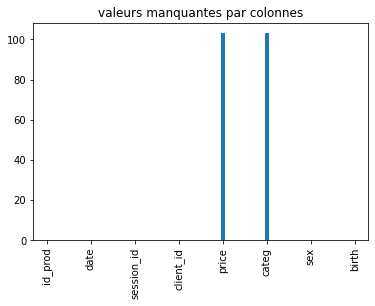

In [26]:
graph_valeurs_manquantes = valeurs_manquantes.plot(kind='bar',width=0.1)
plt.title('valeurs manquantes par colonnes')
plt.show()
fig_val_manquantes = graph_valeurs_manquantes.get_figure()
fig_val_manquantes.savefig("valeurs manquantes par colonnes")

In [27]:
valeurs_manquantes

id_prod         0
date            0
session_id      0
client_id       0
price         103
categ         103
sex             0
birth           0
dtype: int64

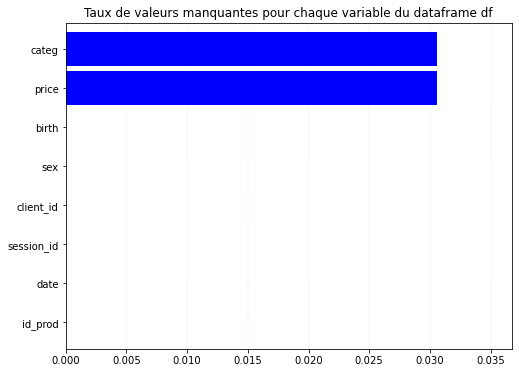

In [28]:
# à revoir n'arrive pas à afficher axe des absisses et ordonnées

size = df.shape
#nan_values = df.isna().sum()

nan_values = valeurs_manquantes.sort_values(ascending=True)*100/size[0]

ax = nan_values.plot(kind='barh', 
                     figsize=(8, 6), 
                     color='#0000FF',
                     zorder=2,
                     width=0.85)

#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

#ax.tick_params(axis="both", 
               #which="both", 
               #bottom="off", 
               #top="off", 
               #labelbottom="on", 
               #left="off", 
               #right="off", 
               #labelleft="on")
ax.set_title("Taux de valeurs manquantes pour chaque variable du dataframe df")
vals = ax.get_xticks()

ax.xlabel = 'taux valeurs manquantes '    
ax.ylabel = 'variables' 

for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    

#plt.show()

fig_taux_val_manquantes =ax.get_figure()
fig_taux_val_manquantes.savefig("taux valeurs manquantes par colonnes") 

On  choisit de supprimer les valeurs manquantes car il y en a très très peu 

In [29]:
#je supprime les valeurs manquantes car très peu de valeurs manquantes
df = df.dropna()

In [30]:
df.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

# Les valeurs aberrantes 

In [31]:
df['price']

0          4.99
1         65.75
2         10.71
3          4.20
4          8.99
          ...  
337011    31.99
337012    22.99
337013    11.03
337014    50.99
337015    17.99
Name: price, Length: 336913, dtype: float64

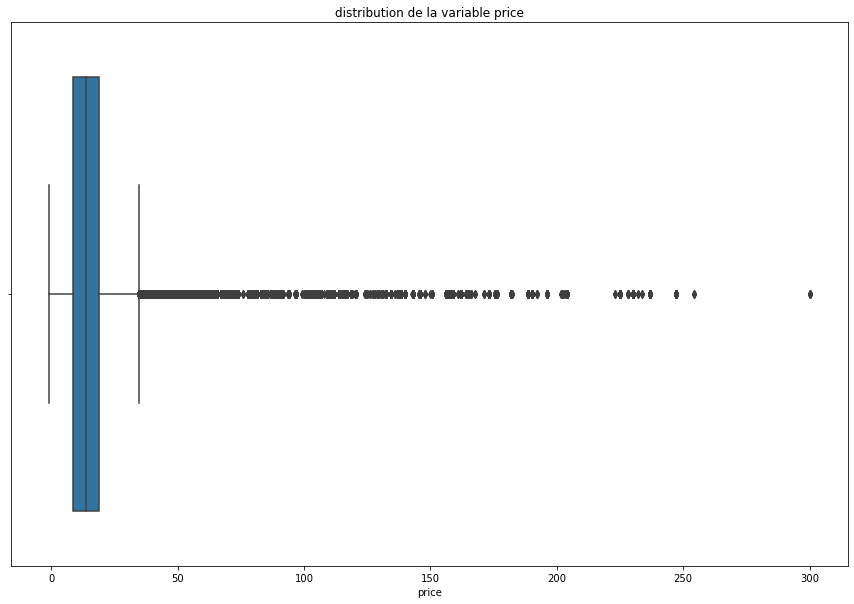

In [32]:
# on regarde la  variable price qui correspond au montant payé pour chaque transaction 
import seaborn as sns
plt.figure(figsize=(15,10))
price_boxplot = sns.boxplot(x= df['price'])

plt.title('distribution de la variable price')
fig_boxplot_price = price_boxplot.get_figure()
fig_boxplot_price.savefig("boxplot_price") 

<AxesSubplot:>

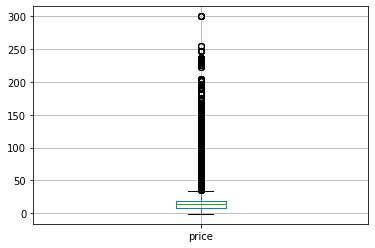

In [33]:
#avec matplotlib
df.boxplot(column="price")

In [34]:
# 1er quartile = 25% 
# 2 eme quartile ou mediane = 50%
# 3 eme quartile 75%
#1er moustache = 1er quartile - 1,5 * intervalleinterquartile 
# 2er moustache = 3er quartile + 1,5 * intervalleinterquartile (diff entre 3 eme quartile et premier quartile)

# pour traiter il faut ramener toutes les valeurs audessus de la 2eme moustache 

In [35]:
# il y a des valeurs négatives dans la colonne price 
df['price'].describe()

count    336913.000000
mean         17.204376
std          17.855658
min          -1.000000
25%           8.580000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [36]:
# on enlève les valeurs negatives 

df= df[df['price']>0]

In [37]:
df.shape

(336713, 8)

<Figure size 432x288 with 0 Axes>

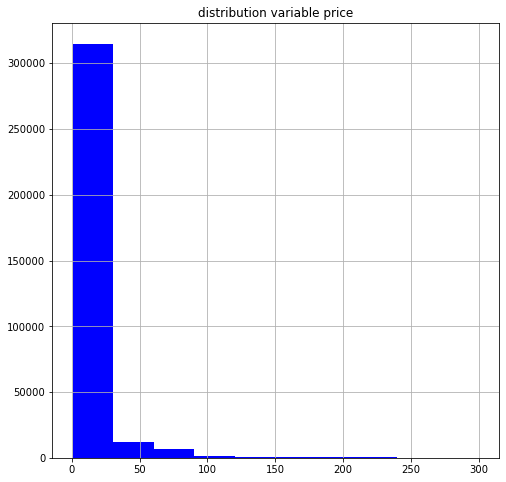

In [38]:
plt.figure()
price_histo = df.hist(column="price",        # Column to plot
              figsize=(8,8),         # Plot size
              color="blue")          # Plot color
#plt.xlabel = 'nombre'    
#plt.ylabel = 'montant '
plt.title("distribution variable price")
plt.savefig('histogramme distribution price') 

### 0n détecte les outliers 

In [39]:
# detecter les outliers en utilisant l'interquartile
def detect_outliers_iqr(data):
    # on range les valeurs et on les transforme  en liste 
    price = sorted(list(data['price']))
    #on groupe les valeurs par quartile 
    q1 = np.nanpercentile(price, 25)
    q3 = np.nanpercentile(price, 75)
    #print(q1, q3)
    #on calcule l'intervalle interquartile 
    IQR = q3-q1
    #l'extrémité des moustaches se calculent enfaisant  1.5 fois l'espace interquartile
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    # les outliers sont les valeurs qui se situent en dehors de cet espace
    outliers= data[(data['price']< lwr_bound) |( data['price']> upr_bound)]
    return outliers# Driver code

In [40]:
sample_outliers = detect_outliers_iqr(df)
#print("Outliers from IQR method: ", sample_outliers)
print(sample_outliers.shape)
sample_outliers.head(25)

-6.959999999999999 34.559999999999995
(20423, 8)


,id_prod,date,session_id,client_id,price,categ,sex,birth
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
27,2_135,2021-05-26 01:46:59.530702,s_39581,c_5192,68.99,2.0,m,1965
72,1_340,2021-12-01 21:40:04.680653,s_127982,c_6266,42.25,1.0,f,1983
73,2_208,2021-08-21 21:58:40.983725,s_78917,c_7881,54.87,2.0,m,1996
84,1_11,2021-11-03 05:22:29.808605,s_114026,c_5070,39.99,1.0,m,1972
111,2_139,2022-01-16 13:39:40.278930,s_150675,c_8517,82.99,2.0,f,2000
132,2_62,2021-08-28 05:50:46.906391,s_81697,c_7806,60.96,2.0,f,1994
147,2_19,2021-05-07 13:32:04.703604,s_31172,c_6884,69.99,2.0,m,1994
150,2_112,2021-06-10 18:55:23.078433,s_46832,c_4924,67.57,2.0,f,1953
151,1_519,2021-12-06 15:10:14.639832,s_130329,c_5427,51.99,1.0,f,2004


### On observe que les valeurs ne sont pas si abberantes que ça. On peut les garder 

### On regarde si il y a des doublons 

In [41]:
#detection des doublons
print(df.shape)


(336713, 8)


In [42]:
df[df.duplicated()]

,id_prod,date,session_id,client_id,price,categ,sex,birth


## Mission 2 : Analyse 

### indicateurs de tendance centrale et de dispersion ;

Le mode
 
 La moyenne 
 
 La médiane
 
 La médiane, (notée Med), est la valeur telle que le nombre d’observations supérieures à cette valeur est égal au nombre d’observations inférieures à cette valeur.

En gros, pour trouver la médiane de vos n
 valeurs, il faut commencer par les trier. Une fois triées, on appelle x(1)
 la première valeur, x(2)
 la deuxième valeur, ... , et x(n)
 la dernière valeur. La médiane, c'est la valeur qui sera exactement au milieu du classement, soit

Med=x(n+12)
M
e
d
=
x
(
n
+
1
2
)


In [43]:
# on fait un describe pour avoir les indicateurs de tendance centrale et dispersion pour la colonne price par categorie
df.groupby('categ')['price'].describe().reset_index()

,categ,count,mean,std,min,25%,50%,75%,max
0,0.0,209426.0,10.646828,4.930030,0.62,6.30,9.99,14.45,40.99
1,1.0,109735.0,20.480106,7.568956,2.00,15.81,19.08,24.98,80.99
2,2.0,17552.0,75.174949,39.079999,30.99,53.99,62.83,71.21,300.00


In [44]:
# on regarde la dispersion des montants par categorie de produits.
categ0 = df[df['categ']==0]
categ1 = df[df['categ']==1]
categ2 = df[df['categ']==2]
price0 = categ0['price']
price1 = categ1['price']
price2 = categ2['price']

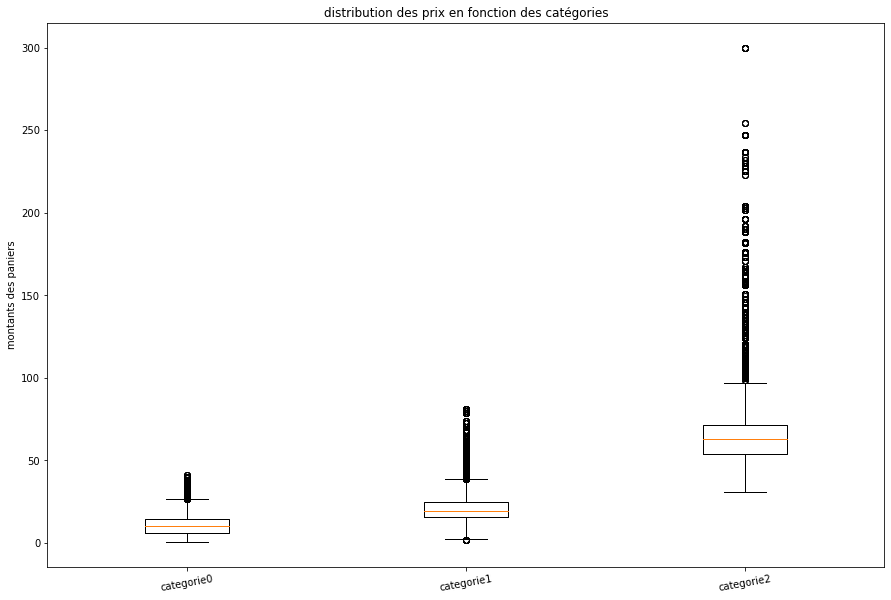

In [46]:
columns = [price0,price1,price2]
plt.figure(figsize=(15, 10))
#plt.subplots()
plt.boxplot(columns)
plt.xticks([1, 2, 3], ["categorie0", "categorie1", "categorie2"], rotation=10)
plt.ylabel('montants des paniers')
plt.title("distribution des prix en fonction des catégories")
plt.savefig("distribution des prix en fonction des catégories")
plt.show()

### On voit que la dispersion des montants est différentes en fonction de la catégorie de produit 


## les mesures de dispersion

La variance empirique



v=1n∑i=1n(xi−x⎯⎯⎯)2
v
=
1
n
∑
i
=
1
n
(
x
i
−
x
¯
)
2



L'écart-type empirique

L'écart-type empirique, c'est juste la racine carrée de la variance empirique. On l'appelle en anglais standard deviation, souvent abrégé std. En fait, quand on calcule la variance empirique des temps de trajet, le résultat a pour unité la minute 2
 , ce qui n'est pas très intelligible. En prenant la racine carrée, l'unité redevient la minute. Ici, notre écart-type vaut 6,55 minutes. On le note s
 .

s=v√


L'écart inter-quartiles

La boîte à moustaches (boxplot)


In [45]:
#faire avec tableau 
df.columns

Index(['id_prod', 'date', 'session_id', 'client_id', 'price', 'categ', 'sex',
       'birth'],
      dtype='object')

In [50]:
# on regarde les montant par genre et on regarde les mesures de dispersion
df.groupby(['sex'])['price'].describe().reset_index()


,sex,count,mean,std,min,25%,50%,75%,max
0,f,167515.0,17.067855,17.362773,0.62,8.61,13.94,18.99,300.0
1,m,169198.0,17.361056,18.329061,0.62,8.58,13.89,18.99,300.0


In [48]:
# on trace des boxplot 
pricebysexf = df[df['sex']=='f']
pricebysexm = df[df['sex']=='m']
pricef = pricebysexf['price']
pricem = pricebysexm['price']

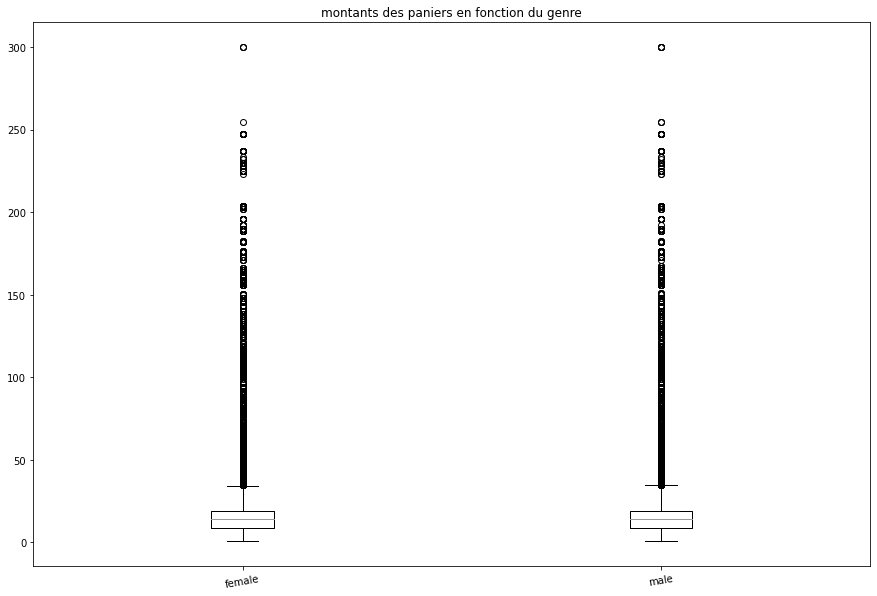

<Figure size 432x288 with 0 Axes>

In [49]:
columns = [pricef,pricem]

plt.figure(figsize=(15, 10))

#plt.subplots()
plt.boxplot(columns)
plt.xticks([1, 2], ["female", "male"], rotation=10)
plt.title("montants des paniers en fonction du genre")
plt.show()
plt.savefig(' boxplots montants des paniers en fonction du genre')

## Les mesures de forme

Le Skewness empirique


Le Kurtosis empirique


## Les mesures de concentration

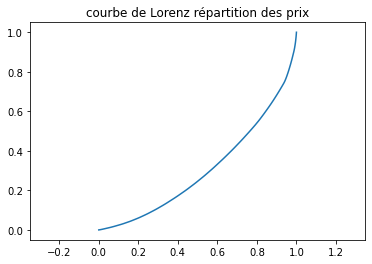

<Figure size 432x288 with 0 Axes>

In [51]:
#courbe de Lorenz : permet de voir comment les montants sont répartis en fonction des achats si les montants sont plutôt égalitaire 

price = df['price']
prix = price.values
#longueur des prix 
n = len(prix)
# trier les individus dans l'ordre croissant des valeurs de la variable et calcul de la somme cumulé 
lorenz = np.cumsum(np.sort(prix)) / prix.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title('courbe de Lorenz répartition des prix')
plt.show()
plt.savefig('courbe de Lorenz répartition des prix')

In [52]:
#indice de Gini qui est la statistique de la courbe de lorenz. Il calcule Il mesure l'aire présente entre la première bissectrice et la courbe de Lorenz
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.392145510890881

## interprétation de l'indice de Gini

0 est l'égalité parfaite et 1 est l'inagalité parfaite.
0.39 indice de Gini c'est que c'est plutôt egalitaire

## Evolution du prix avec le temps

<ipython-input-54-b971a0e8dd3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['date'] = pd.to_datetime(df['date'])


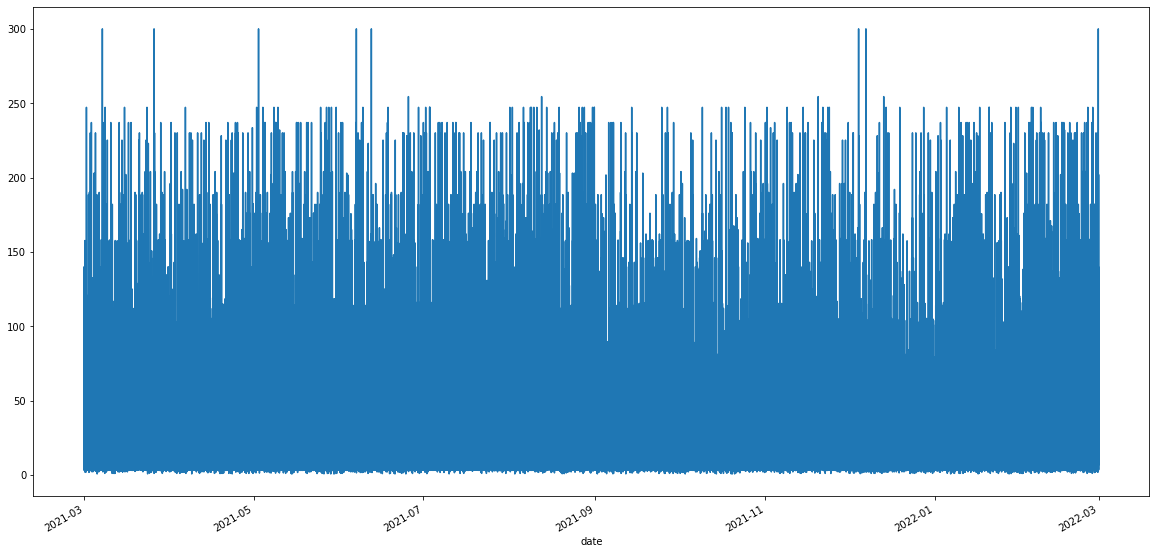

DatetimeIndex(['2021-04-10 18:37:28.723910', '2022-02-03 01:55:53.276402',
               '2021-09-23 15:13:46.938559', '2021-10-17 03:27:18.783634',
               '2021-07-17 20:34:25.800563', '2021-09-15 05:47:48.215162',
               '2021-08-29 05:39:01.055455', '2021-09-19 14:54:52.410362',
               '2022-02-03 07:13:22.559995', '2022-02-26 09:03:10.571665',
               ...
               '2021-10-17 12:47:22.803642', '2021-06-01 12:14:28.924898',
               '2022-01-10 13:47:23.973957', '2021-07-22 13:47:39.400914',
               '2022-02-03 01:39:15.793010', '2021-05-28 12:35:46.214839',
               '2021-06-19 00:19:23.917703', '2021-03-16 17:31:59.442007',
               '2021-10-30 16:50:15.997750', '2021-06-26 14:38:19.732946'],
              dtype='datetime64[ns]', name='date', length=336713, freq=None)

In [54]:
#tracer l'évolution du prix sur le temps
df_date = df[['date','price']]
df_date['date'] = pd.to_datetime(df['date'])
df_date = df_date.set_index('date')
df_date['price'].plot(figsize=(20, 10))
plt.show()

df_date.index

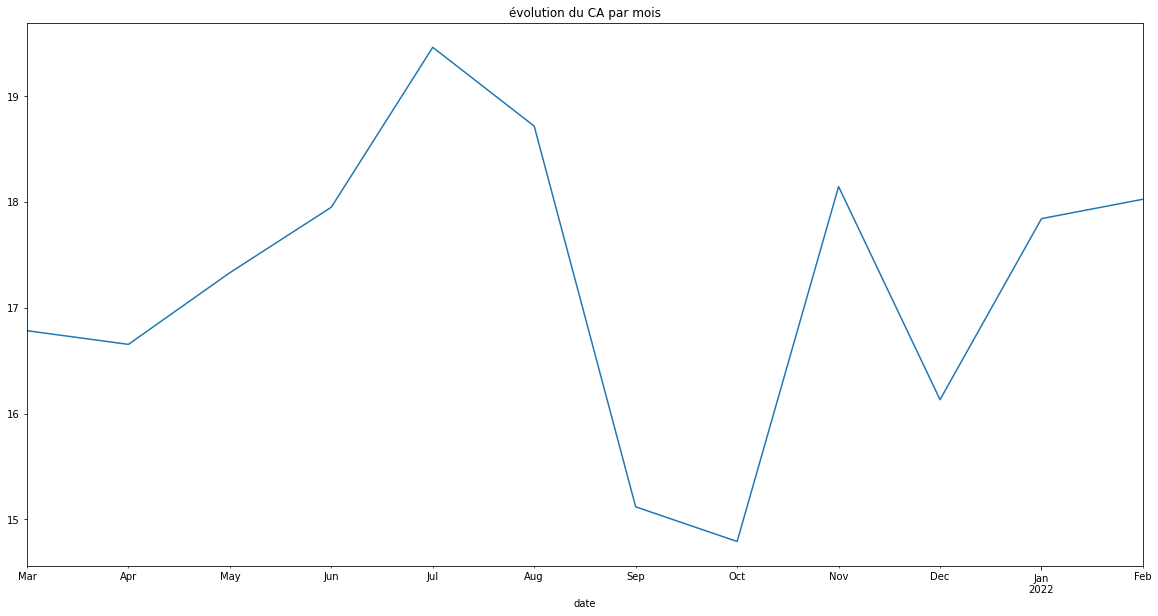

In [55]:
#on fait une moyenne par mois 
df_date_monthly_mean = df_date.resample('M').mean()

df_date_monthly_mean['price'].plot(figsize=(20, 10))
plt.title('évolution du CA par mois')
plt.ylabel('')
plt.show()



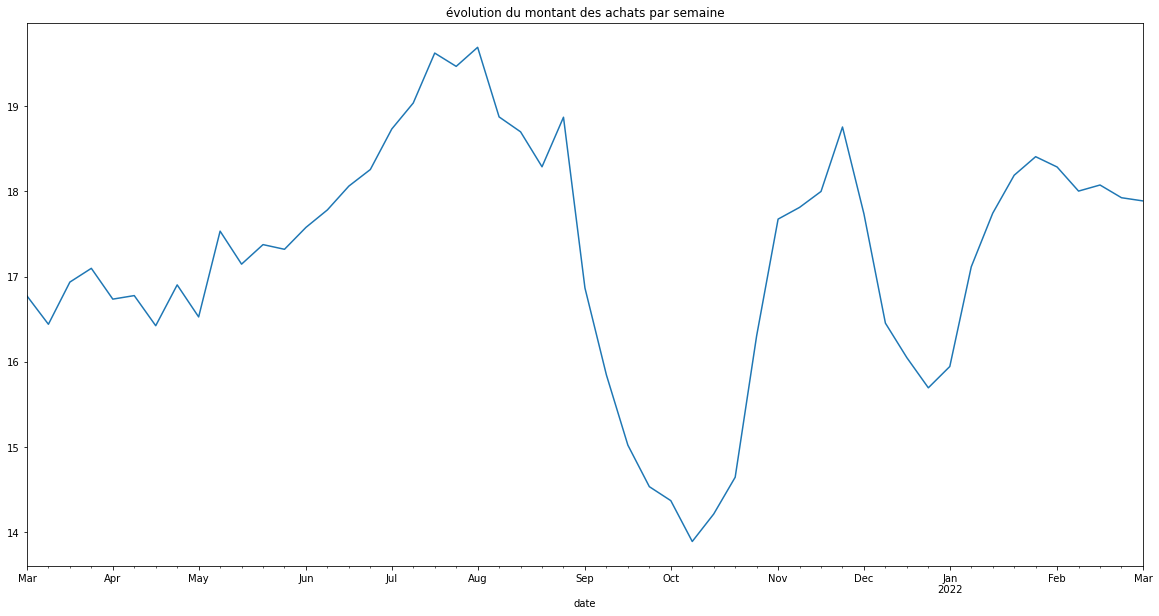

<Figure size 432x288 with 0 Axes>

In [56]:
#moyenne par semaine
df_date_weekly_mean = df_date.resample('W').mean()

df_date_weekly_mean['price'].plot(figsize=(20, 10))
plt.title('évolution du montant des achats par semaine')
plt.show()
plt.savefig('serie temporelle montant des achats semaine')



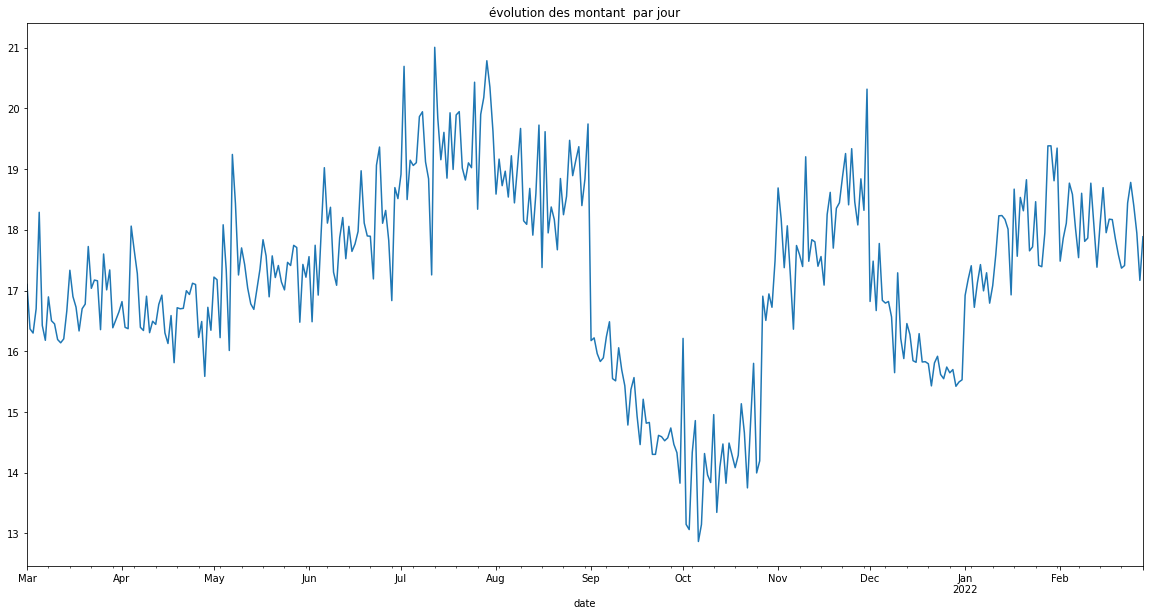

<Figure size 432x288 with 0 Axes>

In [58]:
#moyenne par jour 
df_date_daily_mean = df_date.resample('D').mean()

df_date_daily_mean['price'].plot(figsize=(20, 10))
plt.title('évolution des montant  par jour')
plt.show()
plt.savefig('serie temporelle montant des achats jour')

In [60]:
df_date_daily_mean

,price
date,
2021-03-01,17.100250
2021-03-02,16.368698
2021-03-03,16.300276
2021-03-04,16.700433
2021-03-05,18.289042
...,...
2022-02-24,18.781135
2022-02-25,18.402794
2022-02-26,17.946939


/Users/moradledmaoui/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

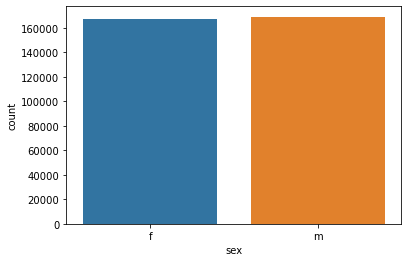

In [61]:
# on regar de la variable genre 'sex'
sns.countplot(df['sex'])


 il y a autant de femmes que d'hommes

/Users/moradledmaoui/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


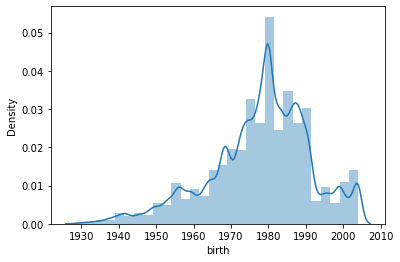

In [65]:
# la variable age
sns.distplot(df['birth'], bins=30)
plt.savefig('densité variable birth')


In [63]:
# je converti les années de naissance en age
from datetime import datetime, date
  
# This function converts given date to age
def age(born):
    return datetime.today().year - born

df['Age'] = df['birth'].apply(age)
df.head()


,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,44
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,21
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,42
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,58
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,41


In [59]:
datetime.today().year

2021

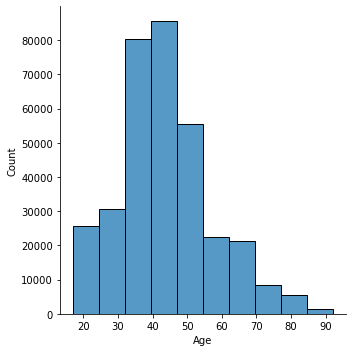

In [66]:
# la variable age
sns.displot(df['Age'], bins=10)
plt.savefig('densité variable Age')

## analyse bivariées  entre 2 variables quantitatives et correlation de pearson

La covariance empirique et le coefficient de corrélation

Devinez quoi ! L'indicateur que nous venons de construire est très utilisé en statistiques ; il s'appelle la covariance empirique de X et Y. Ce terme vous rappelle la variance empirique ? C'est normal : elles sont similaires. Effectivement, si vous calculez la covariance empirique de X et X, vous retombez sur la formule de la variance empirique de X, qui s'écrit  s2X=1n∑ni=1(x−x⎯⎯⎯)2
s
X
2
=
1
n
∑
i
=
1
n
(
x
−
x
¯
)
2
 . Magique !

Pour ramener la covariance empirique à une valeur qui soit comprise entre -1 et 1, alors on peut la diviser par le produit des écarts-types. Cette normalisation nous permet de faire des comparaisons. Ce qui nous donne

rX,Y=sX,YsXsY
r
X
,
Y
=
s
X
,
Y
s
X
s
Y
Ce coefficient r est appelé coefficient de corrélation, ou coefficient de corrélation linéaire, ou encore coefficient de corrélation de Pearson.




## correlation entre age et montant total des achats

Text(0.5, 1.0, 'Scatter plot entre Age et le prix payé')

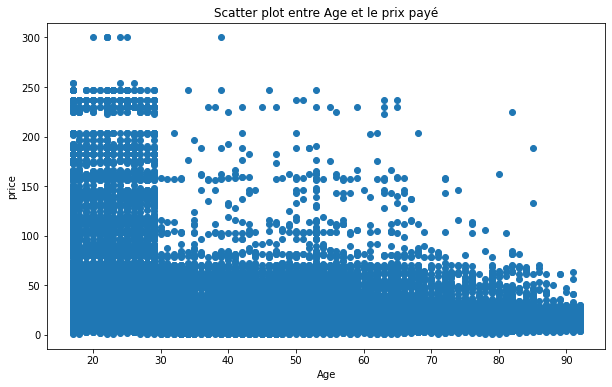

In [67]:
#correlation entre age et price
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['price'], marker='o');
plt.xlabel('Age')
plt.ylabel('price')
plt.title('Scatter plot entre Age et le prix payé')

In [68]:
#coefficient de correlation de Pearson
import scipy.stats as st
import numpy as np

print(st.pearsonr(df["price"],df["Age"])[0])#Un couple de valeurs est renvoyé, le coefficient de corrélation est la premier élément de ce couple, d'où le  [0]
print(np.cov(df["price"],df["Age"],ddof=0)[1,0])#la matrice de covariance deuxième ligne 1ere colonne

-0.21152926170471423
-51.08094556500932


In [69]:
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(df["price"],df["Age"]),
            index = ['pearson',"p-value"],columns = ['résultats de test'])

,résultats de test
pearson,-0.211529
p-value,0.000000


In [64]:
#test corrélation de pearson pour voir si les resultat sont significatif p value : hypothèse H0
# car le coeeficient n'est pas très bas 


Ho : les variables testées sont indépendantes 

la p value est inférieure à 0.05 on rejette Ho  donc on peut en déduire que les valeurs ne sont pas indépendantes 

on a une corrélation négative entre les deux variables : plus l'age est élevé moins les dépenses sur le site sont élevés

In [73]:

taille_classe = 10 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(df["Age"]), taille_classe)
#tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(df["Age"], tranches) # associe chaque solde à son numéro de classe

for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = df.loc[indices==ind,"price"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

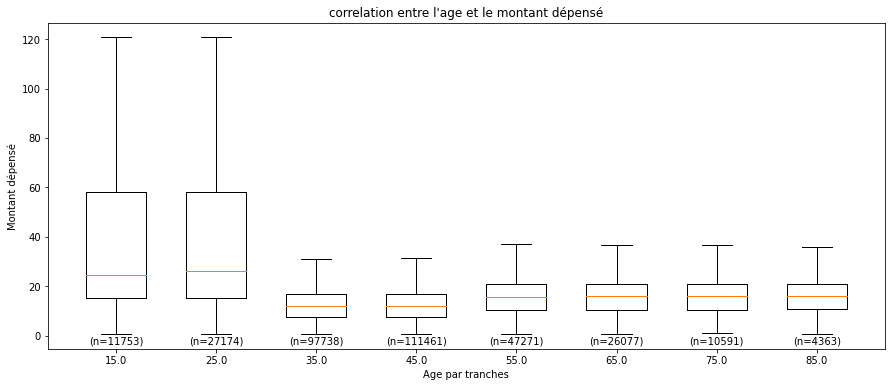

In [74]:
# affichage des boxplots
plt.figure(figsize=(15, 6))
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.6, # largeur graphique des boxplots
)
# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')
plt.xlabel('Age par tranches')
plt.ylabel('Montant dépensé')
plt.title("correlation entre l'age et le montant dépensé" )
plt.savefig("boxplot par tranche d'age correlation age dépenses ")
plt.show()

In [67]:
tranches

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

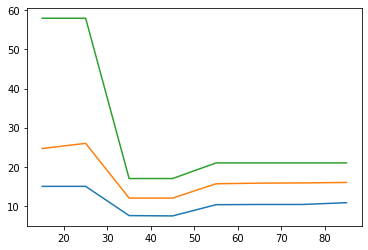

In [68]:
# affichage des quartiles
for n_quartile in range(3):
    plt.plot([g["centre_classe"] for g in groupes],
             [g["quartiles"][n_quartile] for g in groupes])
plt.show()

 ## correlation entre l'age et la catégorie 


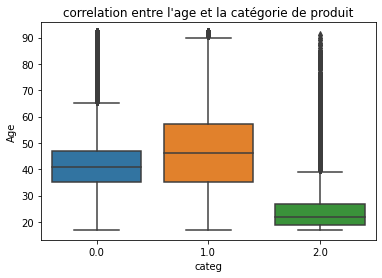

In [76]:
# correlation variable quanti(Age) et quali(catego) 
#on veut savoir si il y a une correlation entre la categorie d'achat et l'age 
X = "categ" # qualitative
Y = "Age" # quantitative

ax = sns.boxplot(x="categ", y="Age", data=df)
plt.title("correlation entre l'age et la catégorie de produit")
boxplot_age_categ = ax.get_figure()
boxplot_age_categ.savefig("boxplot age et categ")


<AxesSubplot:title={'center':'Age'}, xlabel='categ'>

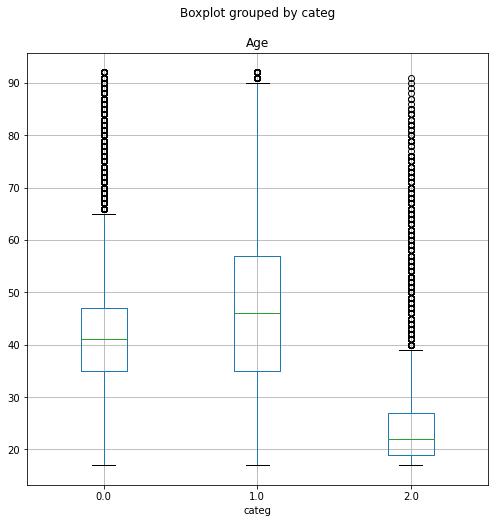

In [78]:

df.boxplot(column="Age",        # Column to plot
                 by= "categ",         # Column to split upon
                 figsize= (8,8))        # Figure size

En fonction de l'age les gens vont acheter des catégories différentes 

## correlation entre deux variables qualitatives (sex, categ)  et test chi2 

In [79]:
#tableau de contingence 
X = "categ"
Y = "sex"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

sex,f,m,Total
categ,,,
0.0,103786,105640,209426
1.0,55469,54266,109735
2.0,8260,9292,17552
Total,167515,169198,336713


In [80]:
cont.columns

Index(['f', 'm', 'Total'], dtype='object', name='sex')

In [81]:

import seaborn as sns

# calcul le tableau  indep  , qui est le tableau représentant le cas d'indépendance
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

In [82]:
#le tableau d'independance au cas ou les variables sont complètement independantes ce sont des fréquences théoriques 
indep

sex,f,m,Total
categ,,,
0.0,104189.610707,105236.389293,209426.0
1.0,54593.254567,55141.745433,109735.0
2.0,8732.134726,8819.865274,17552.0
Total,167515.000000,169198.000000,336713.0


In [83]:
c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep #contient tous les ξij pour chaque case du tableau
xi_n = measure.sum().sum()
table = measure/xi_n

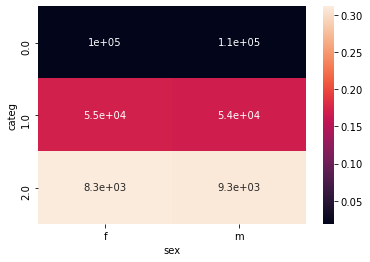

In [86]:
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [87]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [88]:
#statistique du khi2
st_chi2

81.86933350990711

In [89]:
#pvalue 
st_p

1.467788236006804e-15

In [90]:
#nombre degré de liberté 
st_dof

6

In [91]:
st_exp

array([[104189.61070704, 105236.38929296, 209426.        ],
       [ 54593.25456695,  55141.74543305, 109735.        ],
       [  8732.13472601,   8819.86527399,  17552.        ],
       [167515.        , 169198.        , 336713.        ]])

 Au seuil de 1% comme le p value est inferieure à 0.01 on rejette Ho donc on rejette le fait que la variable sex et categ soient indépendantes

Y a-t-il une corrélation entre l'âge des clients et :
Le montant total des achats ;
La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
La taille du panier moyen (en nombre d’articles) 

## correlation entre age et frequence d'achat

In [92]:
df.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,44
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,21
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,42
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,58
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,41


In [93]:
#on crée une colonne mois_année pour avoir les achats par mois 
df['mois'] =pd.to_datetime(df['date']).dt.month

In [94]:
df['annee']=pd.to_datetime(df['date']).dt.year
df['mois_annee']= df.apply(lambda x: str(x.mois)+'_'+str(x.annee),axis = 1)

In [95]:
df.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age,mois,annee,mois_annee
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,44,4,2021,4_2021
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,21,2,2022,2_2022
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,42,9,2021,9_2021
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,58,10,2021,10_2021
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,41,7,2021,7_2021


In [96]:
#on calcule le nombre de session pour chaque mois 
df['mois_annee'].value_counts()

9_2021     33254
12_2021    32417
2_2022     29556
1_2022     29311
3_2021     28559
4_2021     28401
11_2021    28267
5_2021     28237
6_2021     26812
8_2021     25610
7_2021     24712
10_2021    21577
Name: mois_annee, dtype: int64

In [97]:
#on calcule le nombre de sessions pour chaque mois
df_age_session = df.groupby(['client_id','Age','mois_annee'] , as_index = False )['session_id'].count().rename(columns={'session_id':'nbre_session'})

In [98]:
df_age_session.head()

,client_id,Age,mois_annee,nbre_session
0,c_1,66,10_2021,1
1,c_1,66,11_2021,7
2,c_1,66,12_2021,3
3,c_1,66,2_2022,1
4,c_1,66,6_2021,1


In [99]:
taille_classe = 10 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(df_age_session["Age"]), taille_classe)
#tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(df_age_session["Age"], tranches) # associe chaque solde à son numéro de classe

for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    nbre_session = df_age_session.loc[indices==ind,"nbre_session"] # sélection des individus de la tranche ind
    if len(nbre_session) > 0:
        g = {
            'valeurs': nbre_session,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(nbre_session),
            'quartiles': [np.percentile(nbre_session,p) for p in [25,50,75]]
        }
        groupes.append(g)

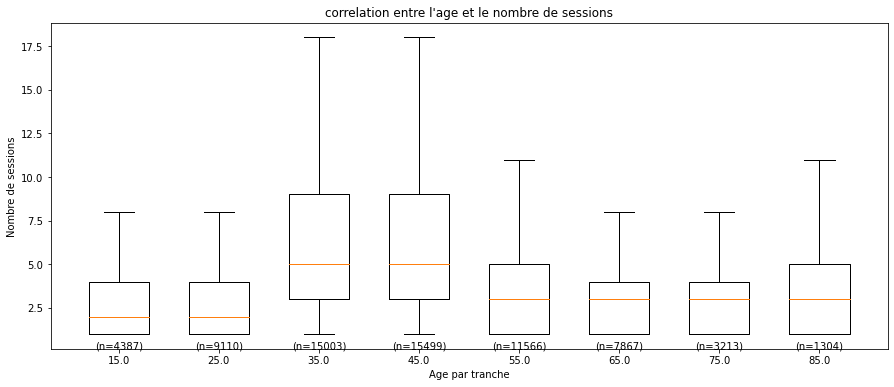

In [100]:
# affichage des boxplots
plt.figure(figsize=(15,6))
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.6, # largeur graphique des boxplots
)
# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='bottom')
plt.xlabel('Age par tranche')
plt.ylabel('Nombre de sessions')
plt.title("correlation entre l'age et le nombre de sessions" )
plt.show()

In [101]:
#on regarde en fonction de l'âge le nombre de session 
df_age_frequence = df.groupby('Age', as_index=False)['session_id'].count().rename(columns={'session_id':'nbre_session'})

In [102]:
df_age_frequence.head()

,Age,nbre_session
0,17,7348
1,18,2182
2,19,2223
3,20,2032
4,21,2174


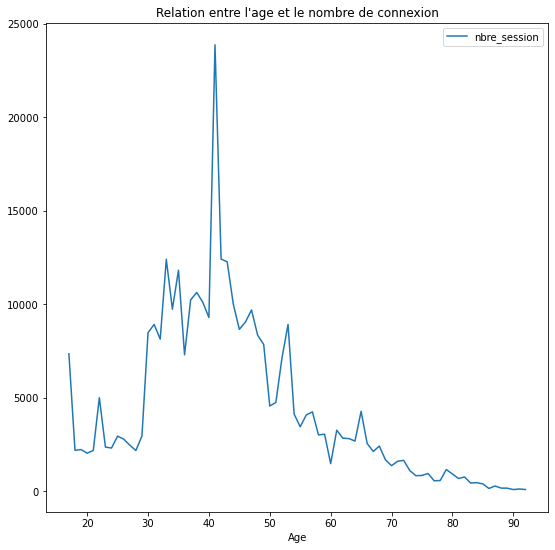

In [103]:
#faire une courbe avec age et nombre de session
df_age_frequence.plot(x="Age",
             y="nbre_session",
             figsize=(9,9))
plt.title("Relation entre l'age et le nombre de connexion")
plt.savefig("courbe entre age et nombre de connexion")

In [105]:
#On calcule la statistique de Pearson
pd.DataFrame(pearsonr(df_age_frequence["nbre_session"],df_age_frequence["Age"]),
            index = ['pearson',"p-value"],columns = ['résultats de test'])

,résultats de test
pearson,-5.292866e-01
p-value,8.843224e-07


H0 on rejette la p value est inférieure à 0.05 on trouve une correlation entre age et la fréquence de connecxion

## Corrélation entre la taille du panier et l'age 

In [106]:
#on crée un tableau avec la taille du panier par client 
df_age_tail_panier = df.groupby(['Age','client_id'], as_index=False)['id_prod'].count().rename(columns ={'id_prod': 'taille_panier'})

In [107]:
df_age_tail_panier.head()

,Age,client_id,taille_panier
0,17,c_1042,6
1,17,c_1046,19
2,17,c_1065,16
3,17,c_1088,7
4,17,c_109,6


In [108]:
#on fait la moyenne par age de la taille du panier 
df_age_panier_mean= df_age_tail_panier.groupby('Age', as_index=False)['taille_panier'].mean()

In [109]:
df_age_panier_mean.head()

,Age,taille_panier
0,17,16.814645
1,18,15.048276
2,19,15.331034
3,20,16.256000
4,21,15.985294


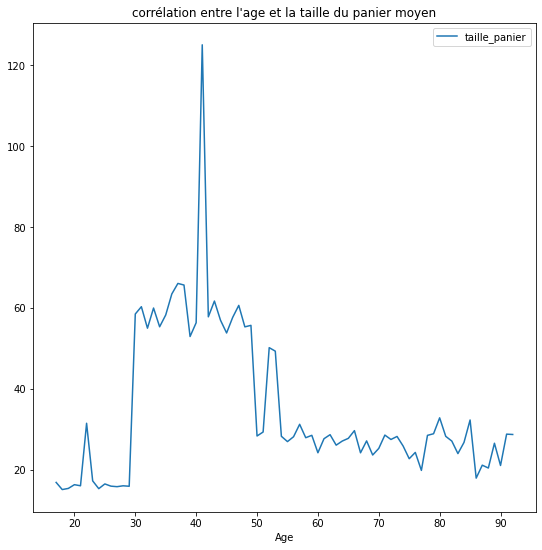

In [111]:
# une courbe correlation entre age et taille du panier 
df_age_panier_mean.plot(x="Age",
                        y='taille_panier',
             figsize=(9,9))
plt.title("corrélation entre l'age et la taille du panier moyen")
plt.savefig("courbe correlation entre age et taille du panier")



In [112]:
# coefficient de pearson
pd.DataFrame(pearsonr(df_age_panier_mean["taille_panier"],df_age_panier_mean["Age"]),
            index = ['pearson',"p-value"],columns = ['résultats de test'])

,résultats de test
pearson,-0.233911
p-value,0.041982


la p value est inférieure à 0.05 on peut rejeter HO : il y a une corélation négative entre l'âge et la taille du panier